## Multiple regression attempt

### Setup

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [5]:
%%R
#open weather_waterlevel_yearly.csv as an R dataframe
df <- read.csv('weather_waterlevel_yearly.csv')

df

    year      PRCP      TMAX        TMIN      SNOW        SNWD
1   1893 29.595238 155.25698  33.6901408 12.369231          NA
2   1894 37.166667  16.72222 -89.5263158        NA          NA
3   1903 15.622340 160.85909  21.4045455  8.933775 160.6666667
4   1904 18.446970 189.86742  27.4865900 17.644628 254.0000000
5   1905 14.422145 197.03472  43.3484321  5.125926 127.0000000
6   1906 18.486111 190.07042  35.7077465 12.985185          NA
7   1907 16.417219 191.00993  42.9667774 17.076923 406.0000000
8   1908 17.843621 192.83846  33.2992424  4.824034          NA
9   1909 14.329670 192.85714  44.0109890  5.696133          NA
10  1910 16.686916 188.56358  37.1184971 13.372340          NA
11  1911 54.488095 167.00822  21.5812672 53.054054          NA
12  1912 43.000000 166.50155  24.8396226 21.761194          NA
13  1913 41.360825 193.33922  39.7805755 32.704918          NA
14  1914 44.230088 198.84483  56.2978723 33.000000          NA
15  1915 53.000000 181.08389  40.0302013 26.696970   0.

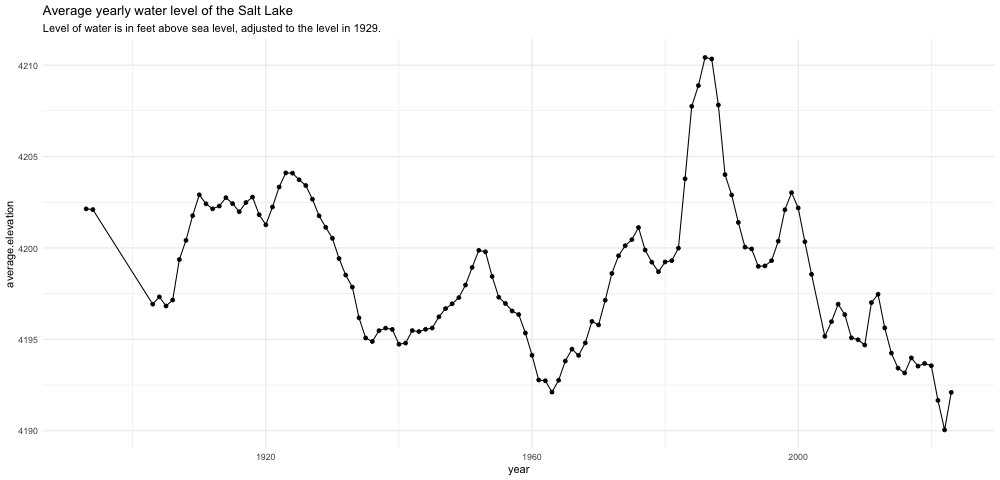

In [48]:
%%R -w 1000
#create a line graph to show the distribution of the data in df
ggplot(df, aes(x=year, y=average.elevation)) + 
geom_line() + 
geom_point() + 
theme_minimal() +
labs(title="Average yearly water level of the Salt Lake", subtitle="Level of water is in feet above sea level, adjusted to the level in 1929.")


`geom_smooth()` using formula = 'y ~ x'


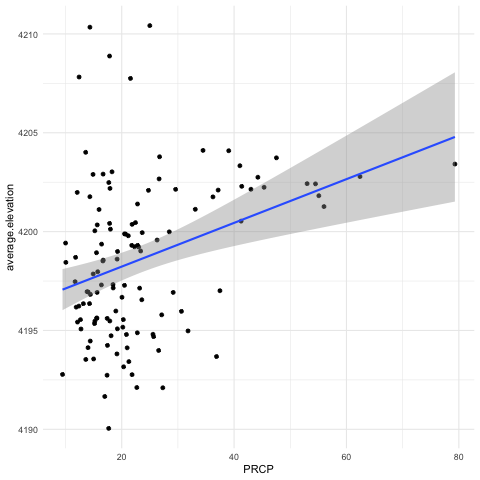

In [26]:
%%R

#plot the relationship between the average.elevation and PRCP
ggplot(df, aes(x=PRCP, y=average.elevation)) + 
geom_point() + 
theme_minimal() + 
geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 31 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 31 rows containing missing values (`geom_point()`). 



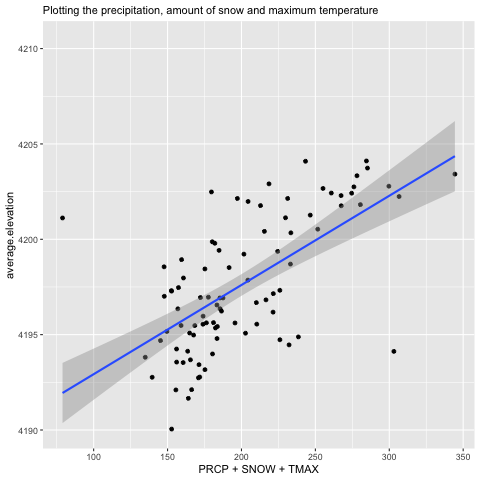

In [51]:
%%R 

# Is there a correlation between ad spending and sales?
ggplot(df, aes(x=PRCP+SNOW+TMAX, y=average.elevation)) +
     geom_point() +
     labs(subtitle="Plotting the precipitation, amount of snow and maximum temperature") +
     theme(
        plot.title = element_text(size=20, face="bold"),
    ) +
    geom_smooth(method = 'lm')

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 31 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 31 rows containing missing values (`geom_point()`). 



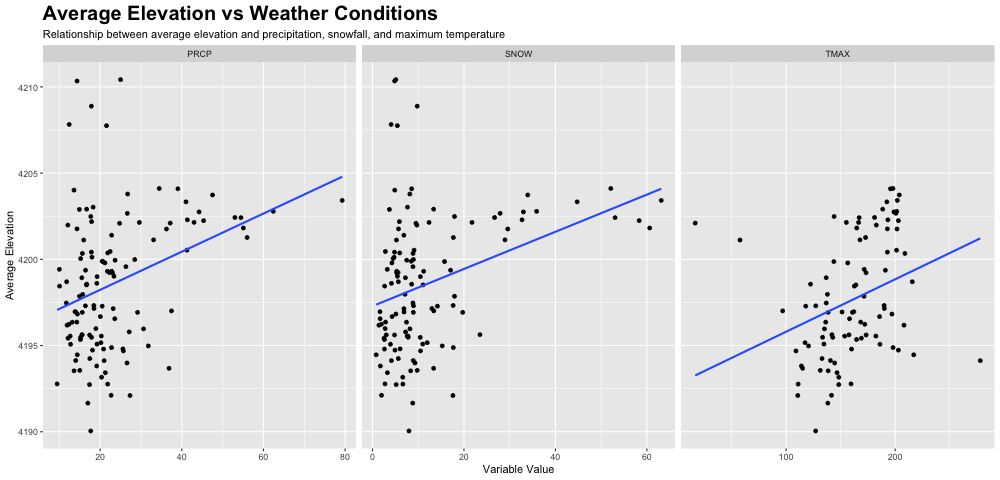

In [61]:
%%R -w 1000

df_long <- pivot_longer(df, cols = c(PRCP, SNOW, TMAX), names_to = "Variable", values_to = "Value")

ggplot(df_long, aes(x=Value, y=average.elevation)) +
    geom_point() +
    geom_smooth(method = 'lm', se = FALSE) + # se=FALSE removes the confidence interval shading
    facet_wrap(~Variable, scales = "free_x") +
    labs(title="Average Elevation vs Weather Conditions",
         subtitle="Relationship between average elevation and precipitation, snowfall, and maximum temperature",
         x="Variable Value", y="Average Elevation") +
    theme(plot.title = element_text(size=20, face="bold"))




In [10]:
%%R
#show column names for df in R
colnames(df)

[1] "year"              "PRCP"              "TMAX"             
[4] "TMIN"              "SNOW"              "SNWD"             
[7] "average.elevation"


In [45]:
%%R 

model <- lm(average.elevation ~ TMAX + SNOW + TMIN + PRCP, data = df)
summary(model)


Call:
lm(formula = average.elevation ~ TMAX + SNOW + TMIN + PRCP, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0609 -1.8836 -0.3724 

 1.5174  8.2258 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4186.98533    4.20986 994.566  < 2e-16 ***
TMAX           0.05415    0.02965   1.827  0.07123 .  
SNOW           0.09322    0.03492   2.669  0.00909 ** 
TMIN          -0.03016    0.03427  -0.880  0.38124    
PRCP           0.05202    0.03563   1.460  0.14789    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.637 on 86 degrees of freedom
  (31 observations deleted due to missingness)
Multiple R-squared:  0.4572,	Adjusted R-squared:  0.4319 
F-statistic: 18.11 on 4 and 86 DF,  p-value: 8.041e-11

